# Comparison of the transfer model, Resnet50, and the designed model
Course: 8P361  &emsp;&emsp;  Group: 10

Helgers, V.M.J. 	&emsp;&emsp; 1329332 <br>
Jong, de R.L.P.D.	&emsp;  1328328 <br>
Korsten, T.		    &emsp;&emsp;&emsp;&emsp; 1340522 <br>
Moharir, S. 		&emsp;&emsp;&emsp;&emsp; 1296256 <br>

## Important notes

1. Note that all functions needed to execute this notebook can be found in the Comparison.py file.

2. If one wants to run this notebook it is important to add the right path to the image data within the function 'get_pcam_generators' which is called below.

## What the notebook does
This notebook compares the designed model with the tranfermodel. Both of these models will be compared on the basis of there AUC score, and PPV and NPV on the validation set, since there are no labels available for the test set. However via a kaggle submission the AUC score on the test set can be aqcuired.

### 1. First, import the relevant functions.

In [1]:
from Comparison import get_pcam_generators_transfer, get_transfer_model, train_transfer_model
from Comparison import get_pcam_generators_des, get_des_model, train_des_model
from Comparison import load_model, ROC_curve, analysis

### 2. Get the models

#### 2.1 Transfer model: Resnet50

In [2]:
train_gen_transfer, val_gen_transfer = get_pcam_generators_transfer('data',train_batch_size=32,val_batch_size=32,shuffle=True)

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


In [3]:
transfer = get_transfer_model('imagenet')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [4]:
train_transfer_model(transfer,train_gen_transfer,val_gen_transfer,'Transfer_model')

/home/8p361-lecturer/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
225/225 [==============================] - 29s 73ms/step - loss: 0.5495 - accuracy: 0.7494 - val_loss: 1.0415 - val_accuracy: 0.4212

Epoch 00001: val_loss improved from inf to 1.04149, saving model to Transfer_model_weights.hdf5
Epoch 2/10
225/225 [==============================] - 12s 54ms/step - loss: 0.3352 - accuracy: 0.8666 - val_loss: 0.7794 - val_accuracy: 0.5337

Epoch 00002: val_loss improved from 1.04149 to 0.77942, saving model to Transfer_model_weights.hdf5
Epoch 3/10
225/225 [==============================] - 12s 53ms/step - loss: 0.3105 - accuracy: 0.8845 - val_loss: 1.5111 - val_accuracy: 0.6950

Epoch 00003: val_loss did not improve from 0.77942
Epoch 4/10
225/225 [==============================] - 12s 53ms/step - loss: 0.2740 - accuracy: 0.8901 - val_loss: 0.9829 - val_accuracy: 0.7600

Epoch 00004: val_loss did not improve from 0.77942
Epoch 5/10
225/225 [==============================] - 12s 53ms/step - loss: 0.2262 - accuracy: 0.9113 - val_loss: 0.1920 -

#### 2.2 Designed model

In [2]:
train_gen_des, val_gen_des = get_pcam_generators_des('data',train_batch_size=128,val_batch_size=128)

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


In [3]:
designed = get_des_model()

In [4]:
train_des_model(designed,train_gen_des,val_gen_des,'Designed_model')

/home/8p361-lecturer/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1125/1125 [==============================] - 148s 126ms/step - loss: 0.4959 - accuracy: 0.7520 - val_loss: 0.3412 - val_accuracy: 0.8524

Epoch 00001: val_loss improved from inf to 0.34125, saving model to Designed_model_weights.hdf5
Epoch 2/10
1125/1125 [==============================] - 142s 126ms/step - loss: 0.3240 - accuracy: 0.8604 - val_loss: 0.2439 - val_accuracy: 0.9012

Epoch 00002: val_loss improved from 0.34125 to 0.24390, saving model to Designed_model_weights.hdf5
Epoch 3/10
1125/1125 [==============================] - 140s 124ms/step - loss: 0.2507 - accuracy: 0.8975 - val_loss: 0.2663 - val_accuracy: 0.8932

Epoch 00003: val_loss did not improve from 0.24390
Epoch 4/10
1125/1125 [==============================] - 140s 125ms/step - loss: 0.2256 - accuracy: 0.9103 - val_loss: 0.2105 - val_accuracy: 0.9189

Epoch 00004: val_loss improved from 0.24390 to 0.21050, saving model to Designed_model_weights.hdf5
Epoch 5/10
1125/1125 [==============================] - 1

### 3. Analysis of the two models

First up load both of the models and the training and validation set, necessary for the analysis

In [2]:
transfer_model = load_model('Transfer_model.json','Transfer_model_weights.hdf5')
train_gen_ta, val_gen_ta = get_pcam_generators_transfer('data',train_batch_size=32,val_batch_size=32,shuffle=False)

designed_model = load_model('Designed_model.json','Designed_model_weights.hdf5')
train_gen_da, val_gen_da = get_pcam_generators_des('data',train_batch_size=128,val_batch_size=128)

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


#### 3.1 Analysis of the transfer model

/home/8p361-lecturer/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


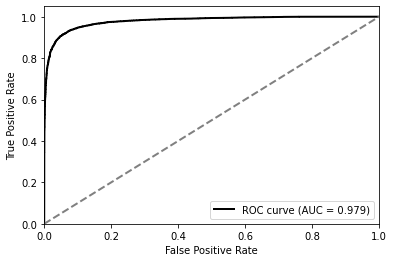

/home/8p361-lecturer/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Positive predictive value = 0.928375
Negative predictive value = 0.928375


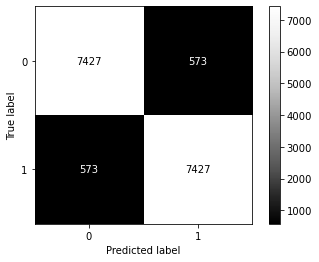

In [3]:
opt_transfer = ROC_curve(transfer_model,val_gen_ta)
analysis(transfer_model,val_gen_ta,opt_transfer)

#### 3.2 Analysis of the designed model

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


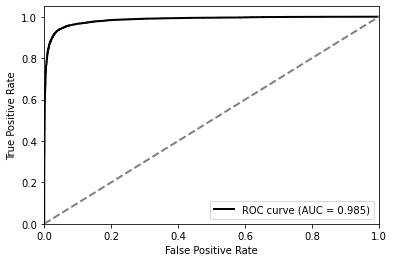

/home/8p361-lecturer/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Positive predictive value = 0.9455068116485439
Negative predictive value = 0.9456182022752844


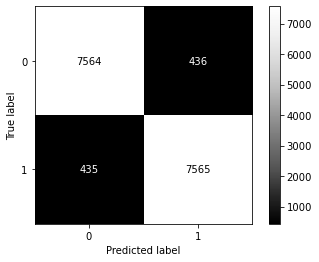

In [4]:
opt_designed = ROC_curve(designed_model,val_gen_da)
analysis(designed_model,val_gen_da,opt_designed)